In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/BigContest/

/content/drive/MyDrive/BigContest


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import geopandas as gpd

In [ ]:
seoul_pnu = gpd.read_file('data/서울시_필지_LX맵/서울시_필지전체.shp', encoding = 'cp949')
seoul_pnu.head(2)

,PNU,SGG_CD,SGG_NM,EMD_CD,EMD_NM,geometry
0,1111010100100010000,11110,종로구,11110101,청운동,"POLYGON ((197211.824 554668.412, 197240.351 55..."
1,1111010100100010001,11110,종로구,11110101,청운동,"POLYGON ((197300.251 554580.847, 197298.254 55..."


In [ ]:
seoul_pnu.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 919736 entries, 0 to 919735
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   PNU       919736 non-null  object  
 1   SGG_CD    919736 non-null  object  
 2   SGG_NM    919736 non-null  object  
 3   EMD_CD    919736 non-null  object  
 4   EMD_NM    919735 non-null  object  
 5   geometry  919736 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 42.1+ MB


In [ ]:
#필지변수 이름 바꾸기
seoul_pnu = seoul_pnu.astype({'PNU' : 'int'})
seoul_pnu.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 919736 entries, 0 to 919735
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   PNU       919736 non-null  int64   
 1   SGG_CD    919736 non-null  object  
 2   SGG_NM    919736 non-null  object  
 3   EMD_CD    919736 non-null  object  
 4   EMD_NM    919735 non-null  object  
 5   geometry  919736 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 42.1+ MB


In [ ]:
raw_df = pd.read_csv('data/필지단위 소상공인 매출등급 정보.csv', encoding = 'cp949')
raw_df.head(2)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD
0,202201,1111010100100030100,11110101,A03,4
1,202201,1111010100100480000,11110101,A01,2


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156040 entries, 0 to 1156039
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   DATA_CRTR_YM  1156040 non-null  int64 
 1   LT_UNQ_NO     1156040 non-null  int64 
 2   STDG_EMD_CD   1156040 non-null  int64 
 3   INDUSTRY_CD   1156040 non-null  object
 4   SLS_GRD       1156040 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 44.1+ MB


In [ ]:
#필지변수 이름 바꾸기
raw_df2 = raw_df.rename(columns = {'LT_UNQ_NO' : 'PNU'})
raw_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156040 entries, 0 to 1156039
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   DATA_CRTR_YM  1156040 non-null  int64 
 1   PNU           1156040 non-null  int64 
 2   STDG_EMD_CD   1156040 non-null  int64 
 3   INDUSTRY_CD   1156040 non-null  object
 4   SLS_GRD       1156040 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 44.1+ MB


In [ ]:
#중복 필지 제거
raw_df3 = raw_df2.drop_duplicates(subset = 'PNU', keep = 'first', ignore_index = True)
raw_df3 = raw_df3[['PNU']]
raw_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74303 entries, 0 to 74302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PNU     74303 non-null  int64
dtypes: int64(1)
memory usage: 580.6 KB


In [ ]:
df = pd.merge(left = seoul_pnu, right = raw_df3, how = 'right', on = 'PNU')
df.head(2)

,PNU,SGG_CD,SGG_NM,EMD_CD,EMD_NM,geometry
0,1111010100100030100,11110,종로구,11110101,청운동,"POLYGON ((197073.176 554737.046, 197092.636 55..."
1,1111010100100480000,11110,종로구,11110101,청운동,"POLYGON ((197305.633 554178.725, 197306.531 55..."


In [ ]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74303 entries, 0 to 74302
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PNU       74303 non-null  int64   
 1   SGG_CD    74199 non-null  object  
 2   SGG_NM    74199 non-null  object  
 3   EMD_CD    74199 non-null  object  
 4   EMD_NM    74199 non-null  object  
 5   geometry  74199 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 4.0+ MB


In [ ]:
df2 = df.dropna(axis = 0)
df2.reset_index(inplace = True)

# 필지가 스타벅스를 포함하고 있는지 여부

In [ ]:
starbucks = pd.read_csv('data/스타벅스_공간데이터.csv', encoding = 'cp949')
starbucks=starbucks.iloc[:,1:10]
starbucks.head(2)

,매장명,위도,경도,매장타입,주소,전화번호,시도,시군,도로명
0,역삼아레나빌딩,37.501087,127.043069,general,서울특별시 강남구 언주로 425 (역삼동),1522-3232,서울특별시,강남구,언주로 425 (역삼동)
1,논현역사거리,37.510178,127.022223,general,서울특별시 강남구 강남대로 538 (논현동),1522-3232,서울특별시,강남구,강남대로 538 (논현동)


In [ ]:
from shapely.geometry import Point, Polygon, LineString

In [ ]:
#geometry 변수 생성
starbucks['geometry'] = starbucks.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
starbucks = gpd.GeoDataFrame(starbucks, geometry='geometry')

In [ ]:
print(seoul_pnu.crs)
print(starbucks.crs) #위도, 경도만으로된 csv데이터는 좌표정보가 없음

EPSG:5186
None


In [ ]:
from fiona.crs import from_string

In [ ]:
#좌표를 변환하려면 기존 좌표가 필요함 (EPSP4326:위경도 좌표)
epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
starbucks.crs = epsg4326
print(starbucks.crs)

GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [ ]:
#변환 좌표: 서울시 지하철, 대학교 공간데이터의 좌표
epsg5186 = from_string('PROJCS["PCS_ITRF2000_TM_1",GEOGCS["ITRF2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [ ]:
starbucks = starbucks.to_crs(epsg5186)
starbucks["geometry"].head()

0    POINT (203808.340 544625.638)
1    POINT (201964.812 545633.983)
2    POINT (201817.950 546072.793)
3    POINT (202784.977 544450.983)
4    POINT (205534.323 543914.181)
Name: geometry, dtype: geometry

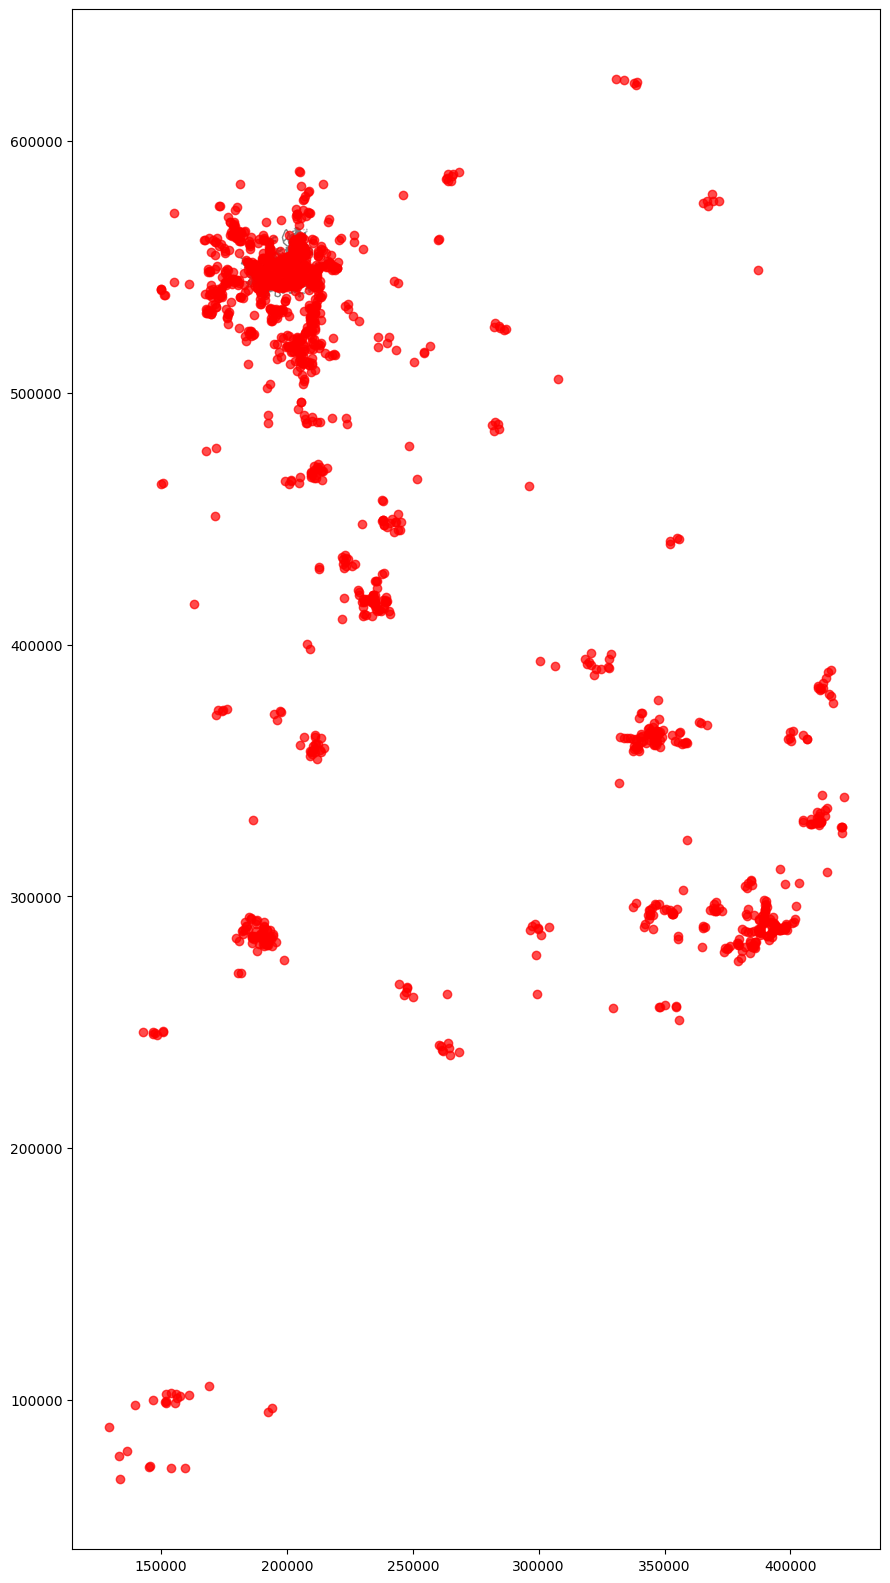

In [ ]:
ax = df2.convex_hull.plot(figsize = (20, 20), color='white', edgecolor='gray')
starbucks.convex_hull.plot(ax = ax, color = 'red', alpha = 0.7)
plt.show()

In [ ]:
starbucks_count = pd.DataFrame()
for i in range(len(starbucks)) :
  starbucks_count[str(i)] = df2['geometry'].intersects(starbucks['geometry'].iloc[i])
starbucks_count

<ipython-input-26-ee77a3f1d278>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  starbucks_count[str(i)] = df2['geometry'].intersects(starbucks['geometry'].iloc[i])
<ipython-input-26-ee77a3f1d278>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  starbucks_count[str(i)] = df2['geometry'].intersects(starbucks['geometry'].iloc[i])
<ipython-input-26-ee77a3f1d278>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

,0,1,2,3,4,5,6,7,8,9,...,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df2['starbucks_count'] = starbucks_count.sum(axis = 1).apply(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
df2['starbucks_count'].max()

1

In [ ]:
df3 = df2.drop(df2.columns[2:7], axis = 1)
df3 = df3.iloc[:, 1:]
df3

,PNU,starbucks_count
0,1111010100100030100,0
1,1111010100100480000,0
2,1111010100100590001,0
3,1111010100100590005,0
4,1111010100100690000,0
...,...,...
74194,1174010800104070000,0
74195,1174010900100390026,0
74196,1174010900101130038,0
74197,1174010900103400035,0


In [ ]:
df3 = df3.astype({'PNU' : 'object'})

In [ ]:
df3.to_csv('필지기준_스타벅스_포함여부.csv', index = False)